# Beamforming Plots

## Inhaltsverzeichnis
- 2 Antennen
- N Antennen

## 2 Antennen

Für die Simulation des Beamforming Falls, werden folgende Annahmen getroffen:
- infinitesimale Dipole
- Antennenabstand $d$
- keine Kopplung zwischen den Antennenelementen
- Fernfeld

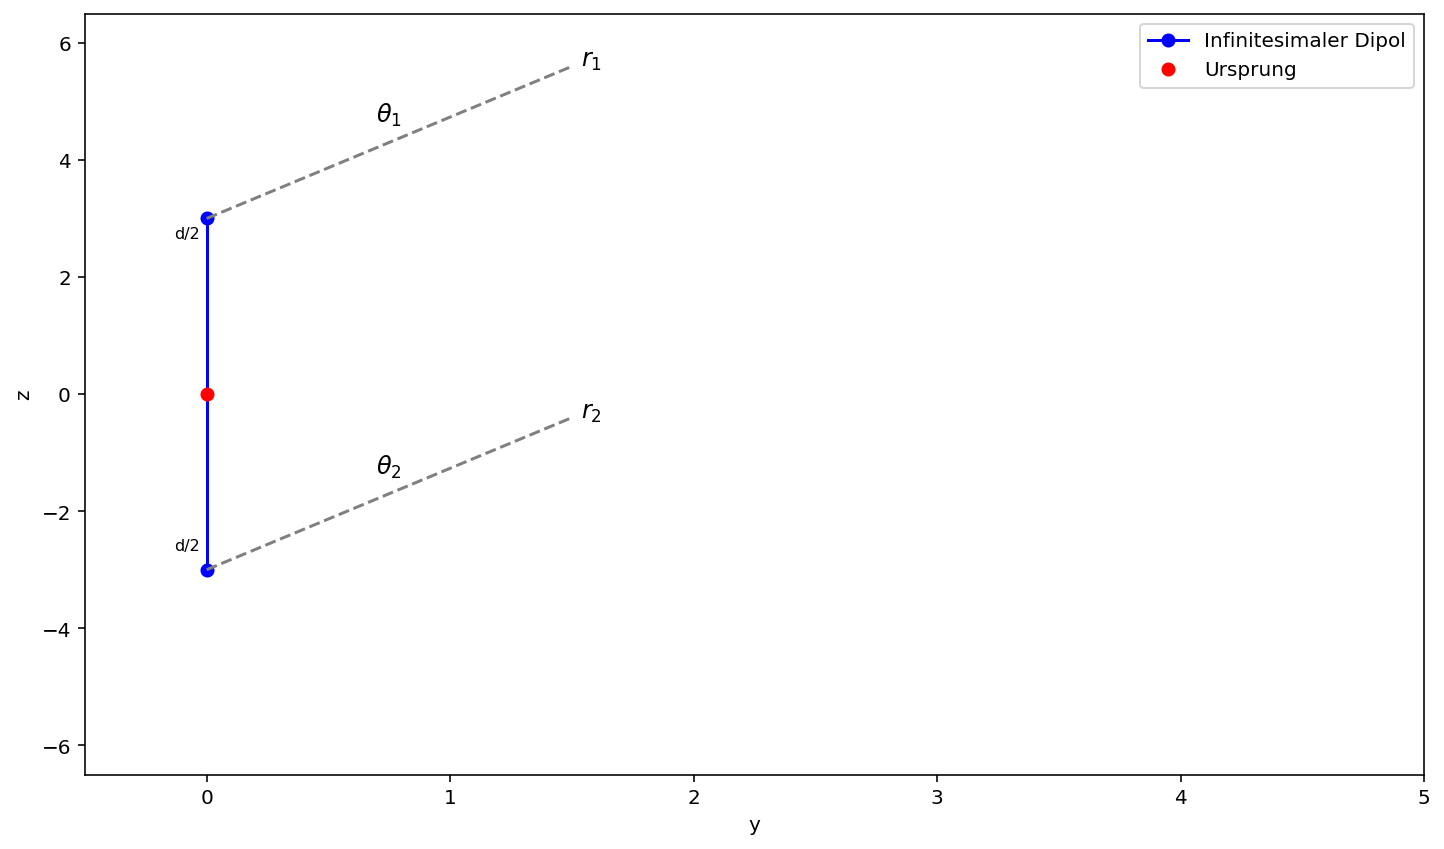

In [3]:
import math
import matplotlib.pyplot as plt

def calculate_points(distance):
    # Punkt 1
    y1 = 0
    z1 = distance

    # Punkt 2
    y2 = 0
    z2 = -distance

    return [(y1, z1), (y2, z2)]

# Beispiel: Abstand von 3
distance = 3
points = calculate_points(distance)

# Punkte plotten
fig, ax = plt.subplots()
ax.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]], 'bo-', label='Infinitesimaler Dipol')

# Ursprung plotten
ax.plot(0, 0, 'ro', label='Ursprung')

# Abstandsmarkierungen hinzufügen
ax.annotate(r'd/2', (points[0][0], points[0][1]), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8)
ax.annotate(r'd/2', (points[1][0], points[1][1]), textcoords="offset points", xytext=(-10,10), ha='center', fontsize=8)

# Achsenbeschriftungen
ax.set_xlabel('y')
ax.set_ylabel('z')

# Achsenbegrenzungen
ax.set_xlim([-0.5, 5])
ax.set_ylim([-6.5, 6.5])

# Winkel und Winkelmarkierungen hinzufügen
theta = 30  # Winkel in Grad
theta_rad = math.radians(theta)
delta_y = distance * math.sin(theta_rad)
delta_z = distance * math.cos(theta_rad)

ax.plot([points[0][0], points[0][0] + delta_y], [points[0][1], points[0][1] + delta_z], 'gray', linestyle='--')
ax.annotate(r'$\theta_1$', (points[0][0] + delta_y * 0.5, points[0][1] + delta_z * 0.5), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)

ax.plot([points[1][0], points[1][0] + delta_y], [points[1][1], points[1][1] + delta_z], 'gray', linestyle='--')
ax.annotate(r'$\theta_2$', (points[1][0] + delta_y * 0.5, points[1][1] + delta_z * 0.5), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)

# Beschriftungen für die grauen Geraden
ax.annotate(r'$r_1$', (points[0][0] + delta_y, points[0][1] + delta_z), textcoords="offset points", xytext=(10, 0), ha='center', fontsize=12)
ax.annotate(r'$r_2$', (points[1][0] + delta_y, points[1][1] + delta_z), textcoords="offset points", xytext=(10, 0), ha='center', fontsize=12)

# Legende anzeigen
ax.legend()

# Plot anzeigen
plt.show()


Die infinitesimalen Dipole sollen entlang der z-Achse mit einem Abstand von $d$.

Durch die verwendung von Kugelkoordinaten und der Fernfeldapproximation und des Superpositionsprinzips wird:

$$
    \vec E_i \approx E_{\theta_i} = j \eta \frac{k I_i l}{4 \pi} \cos{\theta_i} \frac {e^{-j k R_i}}{R_i}
$$

mit den Fernfeldnäherungen: (Näherung durch die Taylorreihe, wie bereits hergeleitet)
- Phase
$$
    R_i = |\vec r - \vec r_i | \approx r - z'_i \cos{\theta}
$$
- Amplitude
$$
    R_i = |\vec r - \vec r_i | \approx r
$$
- Raumwinkel
$$
    \theta \approx \theta_i
$$
zu:

$$
    \vec E \approx \vec E_{\theta 1} + \vec E_{\theta 2} = j \eta \frac{k l}{4 \pi} \cos{\theta} \Big(\frac {I_1 e^{-j k R_1}}{r} + \frac {I_2 e^{-j k R_2}}{r}\Big)
$$
Die Dipole sind jeweils um $z'_1 = - \frac{d}{2} \cos{\theta}$ und $z'_2 =  \frac{d}{2} \cos{\theta}$ in z-Richtung verschoben. Durch einsetzen in $R_i = r - z_i'\cos{\theta}$ kann das elektrische Feld beschrieben werden durch:

$$
    \vec E_{ges} \approx \vec E_{\theta_1} + \vec E_{\theta_2} = \^{\theta} j \eta \frac{k l}{4 \pi} \cos{\theta} \Big(\frac { I_1 e^{-j k ( r - z_1'\cos{\theta})}}{r} + \frac {I_2 e^{-j k ( r - z_2'\cos{\theta}))}}{r}\Big) = \^{\theta} j \eta \frac{k l}{4 \pi r} \cos{\theta} \Big(I_1 e^{-j k ( r - z_1'\cos{\theta})} + I_2 e^{-j k ( r + z_2'\cos{\theta})}\Big)
$$


$$
    = \^{\theta} j \eta \frac{k  l}{4 \pi r} \cos{\theta} \Big(I_1e^{-j k ( r - \frac{d}{2}\cos{\theta})} + I_2 e^{-j k ( r + \frac{d}{2}\cos{\theta})}\Big) =  \^{\theta} j \eta \frac{k l e^{-j k r}}{4 \pi r} \cos{\theta} \Big(I_1 e^{j k  \frac{d}{2}\cos{\theta})} + I_2 e^{-j k \frac{d}{2}\cos{\theta})}\Big)
$$
Um die Phase beliebig variieren zu können wird die Phase $\beta$ der zweiten Stromquelle $I_2$ verzögert:
$$
    I_1 = I_0
$$
$$
    I_2 = I_0 e^{j \beta}
$$
eingesetzt in das elektrische Feld wird der Ausdruck zu:
$$
     =  \^{\theta} j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta}
     \Big(
                   e^{+j  (\frac{kd\cos{\theta}}{2})} +
        e^{j\beta} e^{-j  (\frac{kd\cos{\theta}}{2})}
     \Big)
$$




##### Beobachtung: Das gesamte Feld ist nichts anderes als das Feld eines Dipols der im Ursprung liegt, das mit einem Phasenfaktor multipliziert wird. Der Phasenfaktor wird dabei als Array Faktor ($AF$) bezeichnet.

##### Allgemeines Pattern des gesamten elektrischen Feldes $\vec E_{ges}$: (hier normales Produkt, kein Kreuzprodukt)

$$
    \vec E_{ges} = \vec E_{einzelner Dipol im Ursprung} \times AF
$$
Das Feld eines infinitesimalen Dipols im Ursprung:
$$
    E_{einzelner Dipol im Ursprung} = \^{\theta} j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta}
$$
mit dem Array Faktor:
$$
    AF =                    e^{+j  (\frac{kd\cos{\theta}}{2})} +
        e^{j\beta} e^{-j  (\frac{kd\cos{\theta}}{2})}
$$
Das magnetische Feld ist:

$$
    \vec H = \frac {E_\theta}{\eta} =  \^{\phi} j \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta}
                \left[
                   e^{+j  (\frac{kd\cos{\theta}}{2})} +
        e^{j\beta} e^{-j  (\frac{kd\cos{\theta}}{2})}
                \right]
$$

In [4]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from IPython.display import HTML

In [5]:
x, y, z = sp.symbols('x y z')
r, theta, phi = sp.symbols('r theta phi')

In [6]:
def transform_to_xyz(expr, x, y, z):
    """
        Transformiert eine Funktion die von r, theta, phi abhängt auf eine Funkion die von x,y,z abhängt.
    """
    r, theta, phi = sp.symbols('r theta phi')
    expr = expr.subs([(r, sp.sqrt(x**2 + y**2 + z**2)),
                      (theta, sp.acos(z / sp.sqrt(x**2 + y**2 + z**2))),
                      (phi, sp.atan2(y, x))])
    return expr

In [7]:
def unitvector_theta(H_theta, theta, phi):
    x = H_theta * sp.cos(theta) * sp.cos(phi)
    y = H_theta * sp.cos(theta) * sp.sin(phi)
    z = H_theta * -1*sp.sin(theta)
    return x, y, z

Definieren der Wellenzahl $k$

- $c_0 = 3 \times 10^8$ $\frac{m}{s}$
- $f = 1.8$  GHz
- $\lambda = \frac{c_0}{f}$
- $k = \frac{2\pi}{\lambda}$

In [8]:
c_0 = 3*10e8
f = 1.8*10e9
lamd = c_0/f
k = 2*sp.pi/lamd
k

12.0*pi

## Definition der Konstanten

In [9]:
I_0 = 1
l = 0.0001
eta = 1
d = lamd/4
beta = 1

### Definieren des $\vec E$ Feldes wie oben beschrieben mit

$$
    \vec E_{ges} = \vec E_{einzelner Dipol im Ursprung} \times AF
$$
Das Feld eines infinitesimalen Dipols im Ursprung:
$$
    E_{einzelner Dipol im Ursprung} = \^{\theta} j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta}
$$
mit dem Array Faktor:
$$
    AF =                    e^{+j  (\frac{kd\cos{\theta}}{2})} +
        e^{j\beta} e^{-j  (\frac{kd\cos{\theta}}{2})}
$$

In [10]:
E_dipole_origin = eta*1j*((k*I_0*l*sp.cos(theta))/(4*sp.pi*r))*sp.exp(-1j*k*r)
AF = 2*sp.cos(0.5*(k*d*sp.cos(theta) + beta))

E_ges = E_dipole_origin*AF
E_ges

0.0006*I*exp(-12.0*I*pi*r)*cos(theta)*cos(0.25*pi*cos(theta) + 0.5)/r

Umwandlung der Komponenten des Vektorfeldes von $r$, $\theta$, $\phi$ in Komponenten die von $x$, $y$, $z$ abhängen

In [11]:
E_x,E_y,E_z =  unitvector_theta(E_ges, theta, phi)

xx = transform_to_xyz(E_x, x, y, z)
yy = transform_to_xyz(E_y, x, y, z)
zz = transform_to_xyz(E_z, x, y, z)

Umwandlung der Komponenten aus der symbolischen Sympy Welt in eine diskrete numpy Funktion

In [12]:
E_xx_func = sp.lambdify((x, y, z), xx, modules='numpy')
E_yy_func = sp.lambdify((x, y, z), yy, modules='numpy')
E_zz_func = sp.lambdify((x, y, z), zz, modules='numpy')

xx

0.0006*I*x*z**2*exp(-12.0*I*pi*sqrt(x**2 + y**2 + z**2))*cos(0.25*pi*z/sqrt(x**2 + y**2 + z**2) + 0.5)/(sqrt(x**2 + y**2)*(x**2 + y**2 + z**2)**(3/2))

In [13]:
def E(x,y,z):
    return np.array([np.real(E_xx_func(x,y,z)),
                     np.real(E_yy_func(x,y,z)),
                     np.real(E_zz_func(x,y,z))])

Diskretisierung des elektrischen Feldes $\vec E_{ges}$

In [14]:
start = -20
stop = 20
samples = 8

x_range = np.linspace(start, stop, samples)
y_range = np.linspace(start, stop, samples)
z_range = np.linspace(start, stop, samples)
X, Y, Z = np.meshgrid(x_range, y_range, z_range)
E_field = np.vectorize(E, signature='(),(),()->(n)')(X, Y, Z)

Durch die vectorize Funktion läuft die Indizierung des diskretisierten Feldes in umgekehrter Reihenfolge als gewohnt mit:

        E_field[z,y,x,Komponente]

In [15]:
E_x = E_field[:,:,:,0]
E_y = E_field[:,:,:,1]
E_z = E_field[:,:,:,2]

E_y.max()

2.8108626795311074e-05

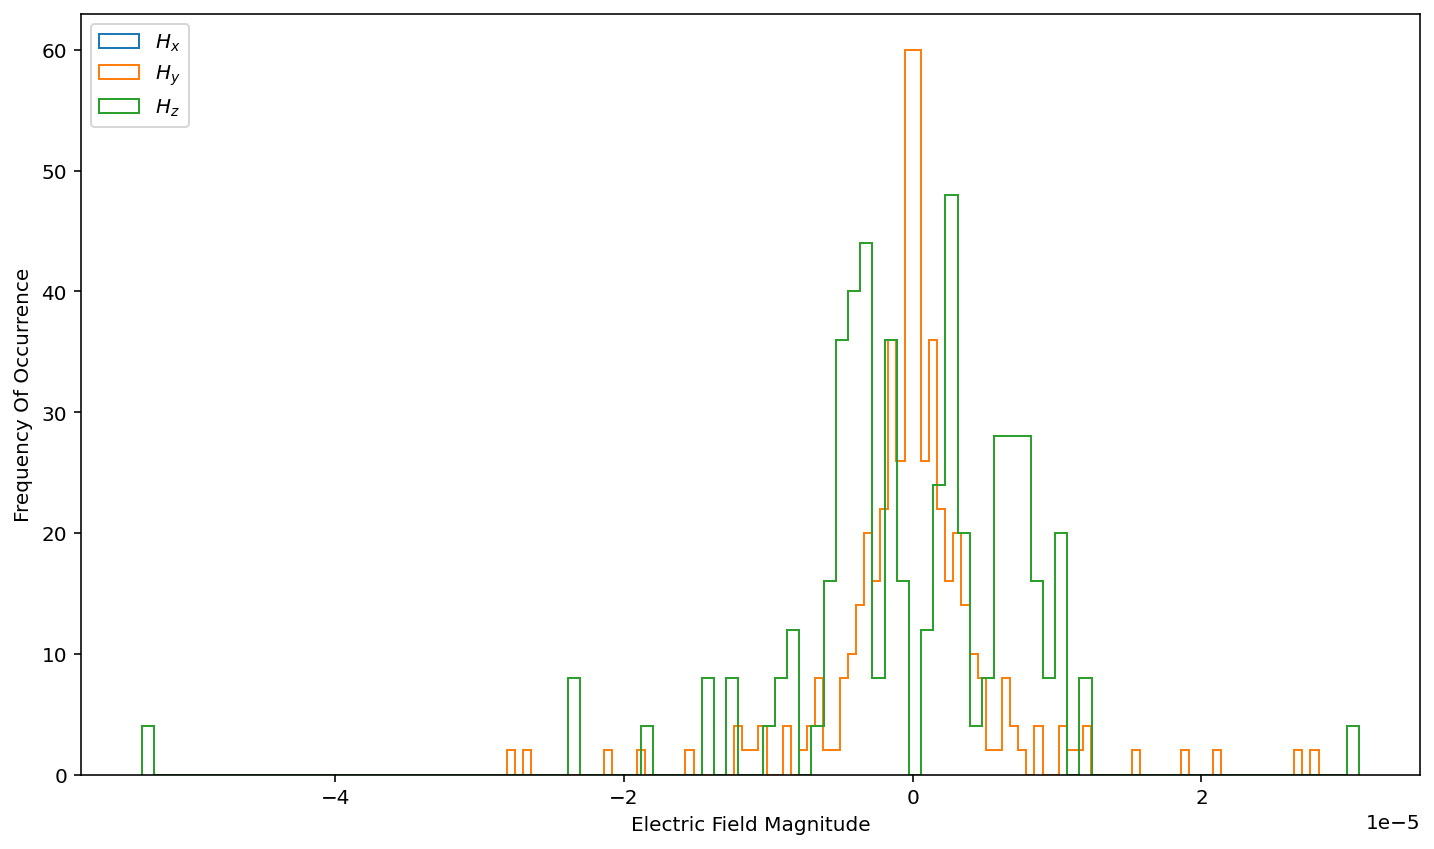

In [16]:
plt.hist(E_x.ravel(), bins=100, histtype='step',label=r'$H_x$')
plt.hist(E_y.ravel(), bins=100, histtype='step',label=r'$H_y$')
plt.hist(E_z.ravel(), bins=100, histtype='step',label=r'$H_z$')
plt.legend()
plt.xlabel('Electric Field Magnitude')
plt.ylabel('Frequency Of Occurrence')
plt.show()

Herausfiltern der Komponenten die nicht viel zum Feld beitragen, alles ausserhalb von $10^{-6}$ liegt wird abgeschnitten (Grundlage: Histogramm)

In [17]:
E_max = 1*10**(-6)
E_x[E_x > E_max] = E_max
E_y[E_y > E_max] = E_max
E_z[E_z > E_max] = E_max

E_x[E_x < -E_max] = -E_max
E_y[E_y < -E_max] = -E_max
E_z[E_z < -E_max] = -E_max

In [18]:
# Definition des Vektorfeldes: Ortsvektor, H-Feld -> Komponenten müssen 1-d übergeben werden, daher wird .ravel() verwendet
data = go.Cone(x=X.ravel(), y=Y.ravel(), z=Z.ravel(),
               u=E_x.ravel(), v=E_y.ravel(), w=E_z.ravel(),
               colorscale='Inferno', colorbar=dict(title=r'$x^2$ norm'),
               sizemode="scaled", sizeref=0.5)
# Achsenbeschriftungen etc.
layout = go.Layout(title=f'Electric Field of Dipole only with H_theta Komponent in tangential Direction',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                #aspectratio=dict(x=1, y=1, z=1),
                                #camera_eye=dict(x=1.2, y=1.2, z=1.2)
                                )
                                )

fig = go.Figure(data = data, layout=layout)


# Anzeigegröße des HTML Outputs festlegen
HTML(fig.to_html(default_width=1000, default_height=600))

In [19]:
start = -0.75
stop = 0.75
samples = 2 ** 7

x_range = np.linspace(start, stop, samples)
y_range = np.linspace(start, stop, samples)
z_range = np.linspace(start, stop, samples)
X, Y, Z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
E_field = np.vectorize(E, signature='(),(),()->(n)')(X, Y, Z)

x, y, z = 0, 1, 2

Text(0, 0.5, 'z')

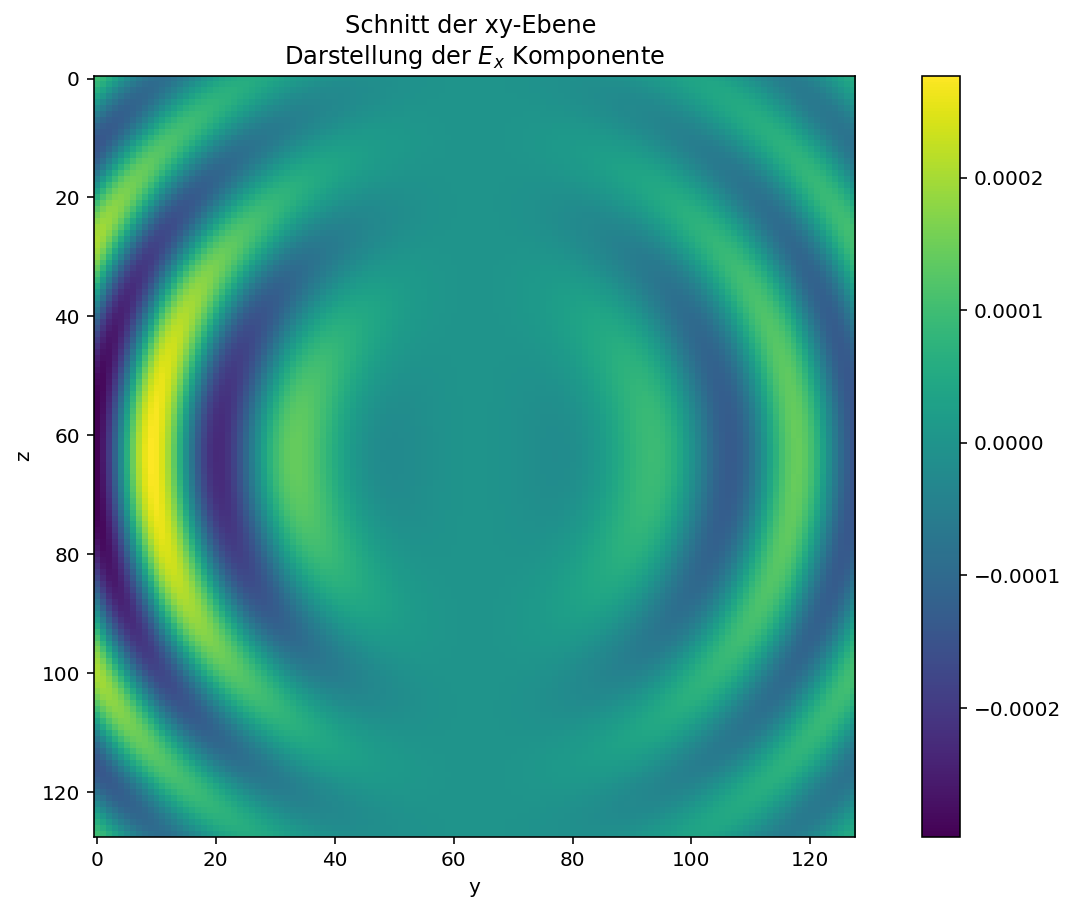

In [20]:
plt.imshow(E_field[3,:,:,x])
plt.colorbar()
plt.title('Schnitt der xy-Ebene \n'+ r'Darstellung der $E_x$ Komponente')
plt.xlabel('y')
plt.ylabel('z')

Text(0, 0.5, 'z')

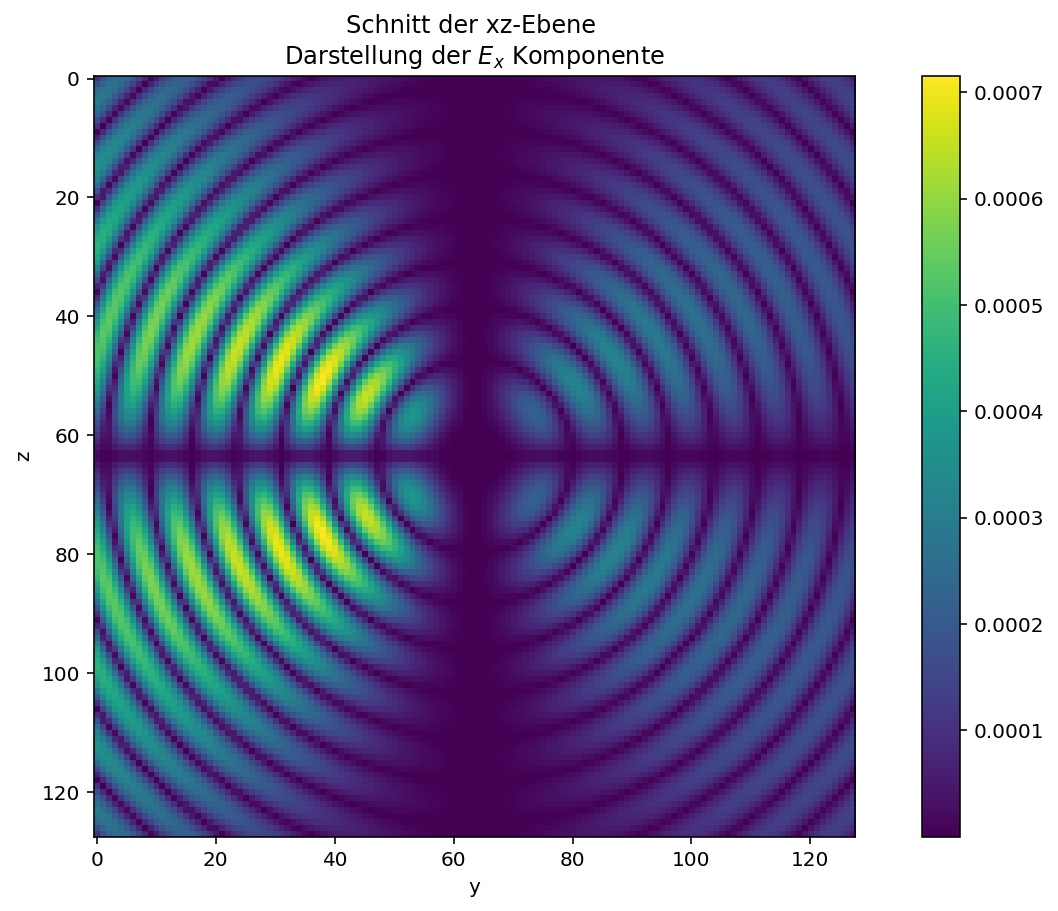

In [21]:
plt.imshow(np.abs(E_field[:,50,:,x]))
plt.colorbar()
plt.title('Schnitt der xz-Ebene \n'+ r'Darstellung der $E_x$ Komponente')
plt.xlabel('y')
plt.ylabel('z')

Text(0, 0.5, 'z')

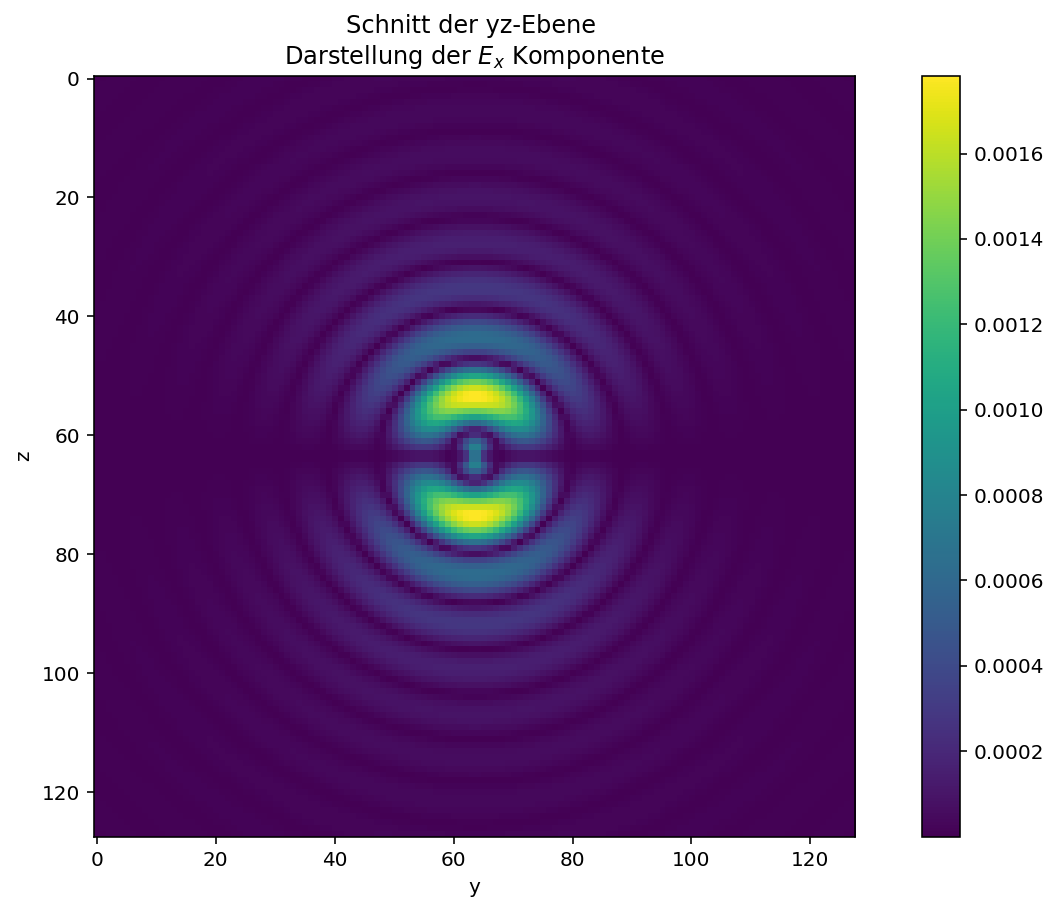

In [22]:
plt.imshow(np.abs(E_field[:,:,50,x]))
plt.colorbar()
plt.title('Schnitt der yz-Ebene \n'+ r'Darstellung der $E_x$ Komponente')
plt.xlabel('y')
plt.ylabel('z')

## Radiation Pattern

In [23]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

Definition der Sympy Konstanten

In [24]:
I_0 = sp.symbols('I', real=True)
k = sp.symbols('k', real=True)
l = sp.symbols('l', real=True)
eta = sp.symbols('eta', real=True)
beta = sp.symbols('beta', real=True)
d = sp.symbols('d', real=True)

Definition der Sympy Argumente

In [25]:
r, theta, phi = sp.symbols('r theta phi', real=True)

### Poynting-Vektor (durchschnittliche Leistungsdichte der Feldkomponenten)

$$
	\vec W_{av} = \frac{1}{2} \vec E \times \vec H^\star =  \frac{1}{2}  \^{\theta} E_\theta \times \^{\phi} H_{phi}^\star = \begin{bmatrix}
  0 \\
  E_\theta \\
  0
\end{bmatrix} \times \begin{bmatrix}
  0 \\
  0 \\
  H_{\phi}^\star
\end{bmatrix}  =  \frac{1}{2}  \^{r} E_\theta H_{\phi}^\star = \frac{1}{2}  \^{r} W_r
$$

### Ausgestrahlte Leistung $P_{rad}$ des Dipols

$$
	P_{rad} = \oiint\limits_{S} W_{rad} ds =   \int_0^{2\pi }  \int_0^{\pi } W_r r^2 \sin{\theta} d\theta d\phi
$$

In [26]:
def get_power_and_poynting_vector(E_theta, H_phi):
    """
    Diese Funktion berechnet den Poynting-Vektor W_r, sowie das Oberflächen Integral der Leistung P_rad, die über eine Kugel abgestrahlt wird.
    :param E_theta:
    :param H_phi:
    :return:
    """
    r, theta, phi = sp.symbols('r theta phi', real=True)

    r_vector = sp.Matrix([r * sp.sin(theta) * sp.cos(phi),
                     r * sp.sin(theta) * sp.sin(phi),
                     r * sp.cos(theta)])
    dA = r_vector.diff(theta).cross(r_vector.diff(phi)).norm().simplify()

    E = sp.Matrix([0, E_theta, 0    ])
    H = sp.Matrix([0, 0      , H_phi])
    W = 0.5 * E.cross(H.conjugate())
    W_r = W[0]
    P_rad = sp.integrate(W_r*dA, (theta, 0, sp.pi), (phi, 0, 2*sp.pi))

    return W_r, P_rad

### Definieren des $\vec E$ Feldes wie oben beschrieben mit

$$
    \vec E_{ges} = \vec E_{einzelner Dipol im Ursprung} \times AF
$$
Das Feld eines infinitesimalen Dipols im Ursprung:
$$
    E_{einzelner Dipol im Ursprung} = \^{\theta} j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta}
$$
mit dem Array Faktor:
$$
    AF =                    e^{+j  (\frac{kd\cos{\theta}}{2})} +
        e^{j\beta} e^{-j  (\frac{kd\cos{\theta}}{2})}
$$

In [27]:
I_1 = I_0
I_2 = I_0*sp.exp(1j*beta)

E_dipole_origin = eta*1j*((k*l*sp.sin(theta))/(4*sp.pi*r))*sp.exp(-1j*k*r)
AF = I_1 * sp.exp(1j*k*(d/2)*sp.cos(theta)) + I_2 * sp.exp(-1j*k*(d/2)*sp.cos(theta))

E_theta_ges = E_dipole_origin*AF
H_theta_ges = E_theta_ges/eta
E_theta_ges

0.25*I*eta*k*l*(I*exp(1.0*I*beta)*exp(-0.5*I*d*k*cos(theta)) + I*exp(0.5*I*d*k*cos(theta)))*exp(-1.0*I*k*r)*sin(theta)/(pi*r)

Berechnen des Poynting-Vektors $W_{r}$ & der abgestrahlten Leistung $P_{rad}$ über einer Kugeloberfläche

In [28]:
W_r, P_r = get_power_and_poynting_vector(E_theta_ges, H_theta_ges)

In [29]:
W_r

0.03125*eta*k**2*l**2*(I*exp(-0.5*I*d*k*cos(theta)) + I*exp(-1.0*I*beta)*exp(0.5*I*d*k*cos(theta)))*(I*exp(1.0*I*beta)*exp(-0.5*I*d*k*cos(theta)) + I*exp(0.5*I*d*k*cos(theta)))*sin(theta)**2/(pi**2*r**2)

Radiation Pattern $U$ = normierter Poynting Vektor

In [30]:
W = W_r
#W  = W_r.subs([(d, d_constant), (k, k_constant), (beta, beta_constant), (I_0, 1)])
U = W*(r**2 / (4.5*eta*l**2))
U

0.00694444444444444*k**2*(I*exp(-0.5*I*d*k*cos(theta)) + I*exp(-1.0*I*beta)*exp(0.5*I*d*k*cos(theta)))*(I*exp(1.0*I*beta)*exp(-0.5*I*d*k*cos(theta)) + I*exp(0.5*I*d*k*cos(theta)))*sin(theta)**2/pi**2

U normiert

In [31]:
#U = 2*sp.sin(theta)**2 *(1+sp.cos(k*d*sp.cos(theta) - beta))
#U

Ersetzen der Konstanten des elektrischen Feldes durch Werte:
- $c_0 = 3 \times 10^8$ $\frac{m}{s}$
- $f = 1.8$  GHz
- $\lambda = \frac{c_0}{f}$
- $k = \frac{2\pi}{\lambda}$

Die Phase $\beta$ ist der Parameter um die Richtung der Leistung des Antennen Arrays zu steuern, dieser wird hier auf $$\beta = \pi$$ gesetzt. Da $\beta$ im Exponenten des Feldes noch halbiert wird, liegt somit ein Leistungsmaximum bei $\frac{\pi}{2}$.

In [32]:
f = 1.8*10e9
c_0 = 3*10e8
lamd = c_0/f
d_constant = lamd/4
k_constant = 2*sp.pi/lamd
beta_constant = sp.pi
I_constant = 1

U = U.subs([(beta, beta_constant),(d, d_constant), (k, k_constant), (I_0, I_constant)])
U

1.0*(exp(-1.0*I*pi)*exp(0.25*I*pi*cos(theta)) + exp(-0.25*I*pi*cos(theta)))*(exp(0.25*I*pi*cos(theta)) + exp(1.0*I*pi)*exp(-0.25*I*pi*cos(theta)))*sin(theta)**2

Transformieren des elektrischen Feldes aus der sympy Welt in eine diskrete numpy Funktion.

In [33]:
U_func = sp.lambdify((theta), U, modules='numpy')

### Funktion liefert das von $\theta$ abhängige Radiation Pattern $U$

In [34]:
def get_bf_radiation_pattern(theta):
    return U_func(theta)

### Definieren des Basisvektors $\^{r} = \frac{\partial \vec r}{\partial r}$

In [35]:
def sph2cart(r, theta, phi):
  '''
  Function transform points stored in spherical coordinate system to points on Catersian coordinate system
  r is the radial distance
  theta is the vector of polar angles
  phi is the vector of azimuth angles
  '''
  x = r * np.cos(phi)*np.sin(theta)
  y = r * np.sin(phi)*np.sin(theta)
  z = r * np.cos(theta)
  return x, y, z

### Diskretisierung des Radiation Patterns in Polarkoordinaten

In [36]:
numPts = 2**7
theta = np.linspace(start = 0, stop = 2*np.pi, num = numPts)
g = get_bf_radiation_pattern(theta)

### Plots des Radiationpatterns auf der Polarebene in Abhängigkeit von $r$ und $\theta$

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning:

Casting complex values to real discards the imaginary part



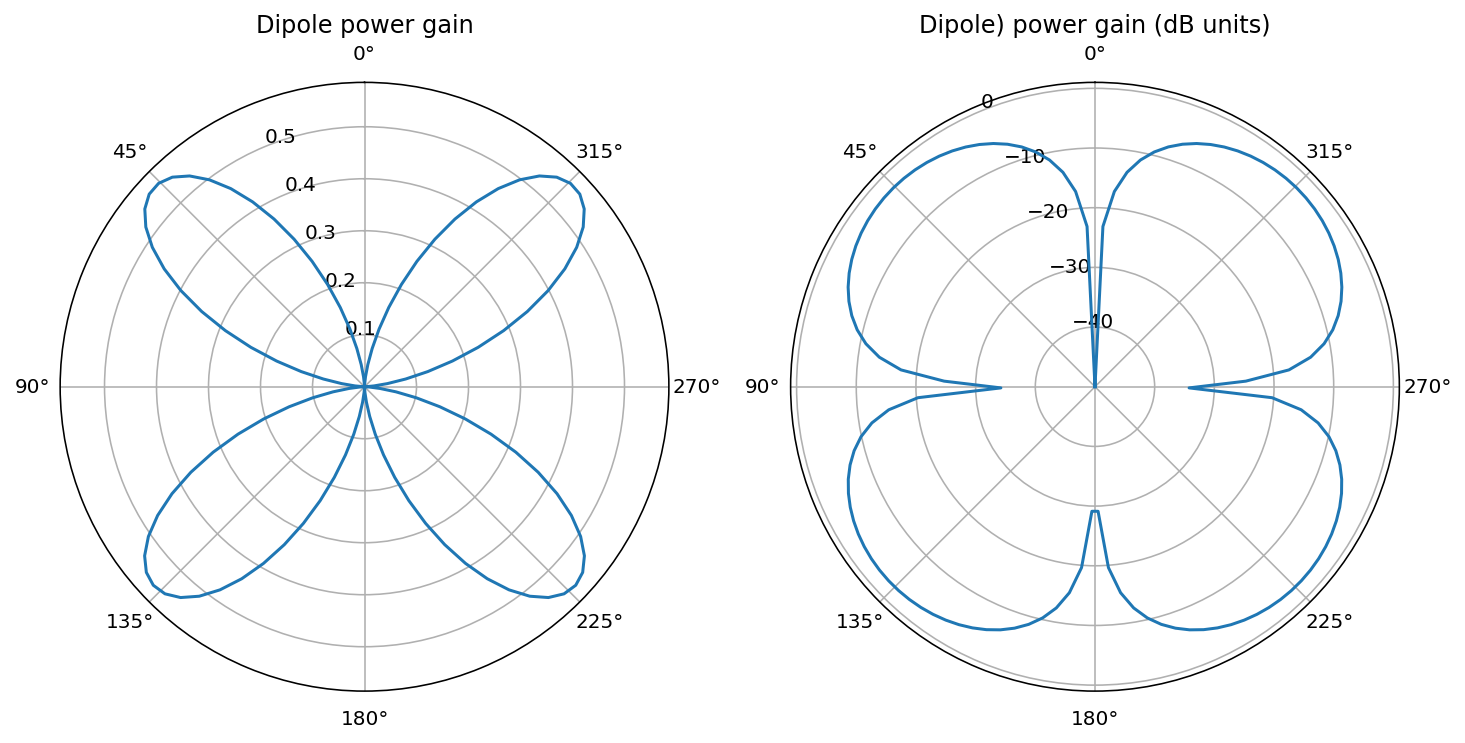

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2, subplot_kw={'projection': 'polar'}, figsize=(12, 10))

# Plot 1
ax1.set_theta_zero_location("N")
lineObjects = ax1.plot(theta,g)
ax1.set_title('Dipole power gain');

# To avoid divide by zeros error in taking log10 replace 0 values by machine eps
g = np.where(g==0,np.finfo(float).eps,g)
gdB = 10*np.log10(g)
# gain clipped to minimum -50 dB level for plot
gdB = np.where(gdB<=-50, -50, gdB)

#Plot 2
ax2.set_theta_zero_location("N")
lineObjects = ax2.plot(theta,gdB)
ax2.set_title('Dipole) power gain (dB units)')

ax2.set_rmax(1);ax2.set_rmin(-50)

### 3-D Plot des Radiation Patterns $U$ im $R^3$

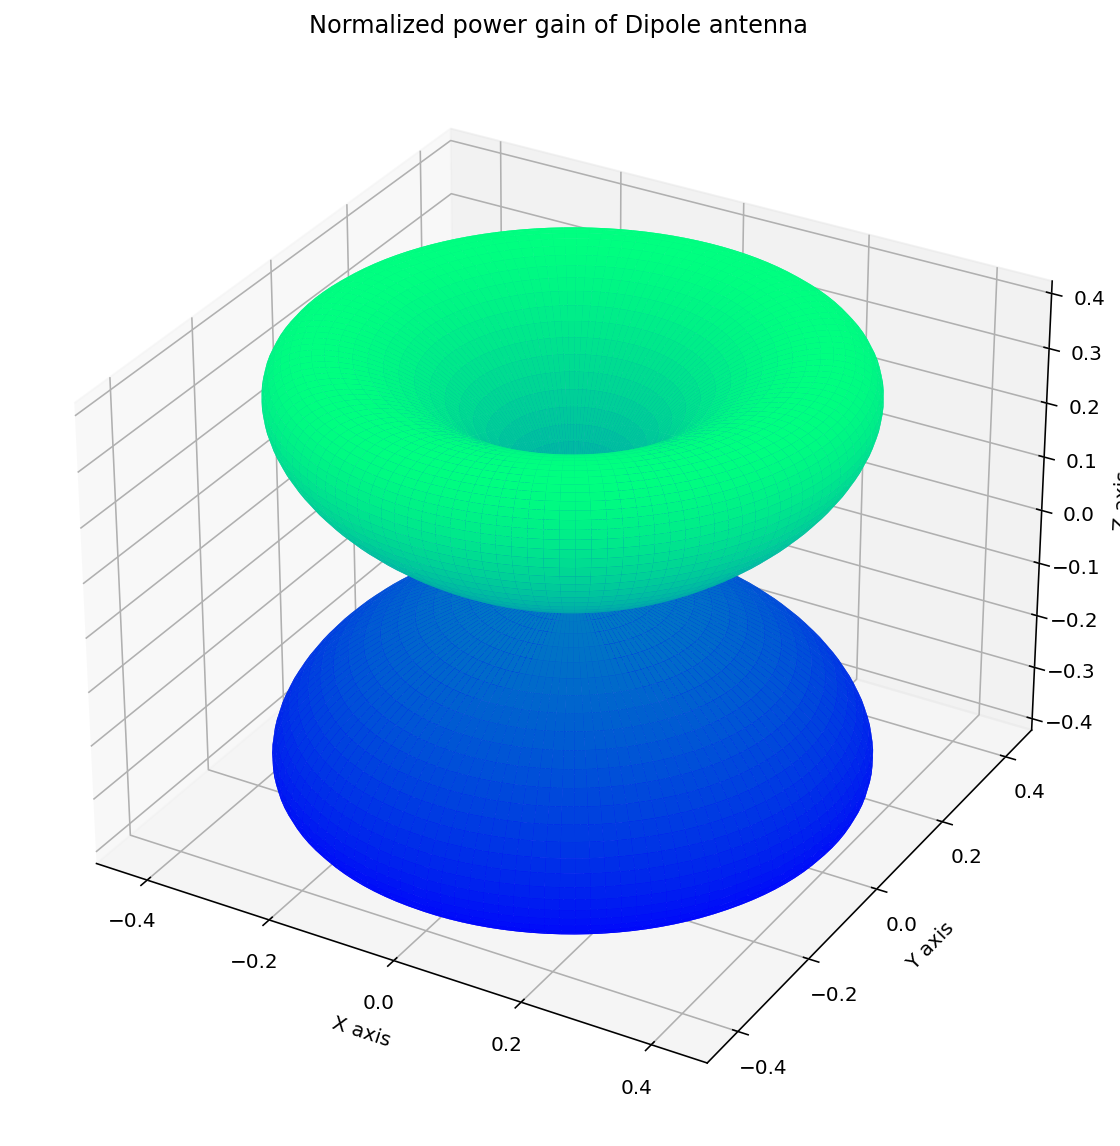

In [38]:
#%matplotlib qt
N = 2**7
theta = np.linspace(start = 0, stop = np.pi, num = N)
phi = np.linspace(start = 0, stop = 2*np.pi, num = N)
[P,T] = np.meshgrid(phi,theta)
G = get_bf_radiation_pattern(T)
# Multiply coefficient G with basisvector r in spherical koordinates
[X,Y,Z] = sph2cart(G, T, P)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12, 10))
ax.plot_surface(np.real(X),np.real(Y),np.real(Z), rstride=1, cstride=1,cmap='winter')
ax.set_title('Normalized power gain of Dipole antenna')
ax.set_xlabel('X axis');ax.set_ylabel('Y axis');ax.set_zlabel('Z axis');

# Wer die Herleitung für das elektrische Feld eines Antennen Arrays für N Antennen nicht sehen möchte überspringt die nachfolgende Zelle einfach.

## Herleitung: N Antennen

Annahmen:
- Fernfeld
- die Antennen des Antennen Arrays sind entlang der positiven z-Achse beginnend im Ursprung verteilt
- die Phasenverschiebung der Stromquellen steigt linear mit dem Abstand zum Ursprung beginnend mit 0
- $\theta_n \approx \theta$
- Amplitude: $R_n \approx r$
- Phase: $R_n \approx r - z' \cos{\theta}$
- Antennenabstand $d$
- $z'$ ist somit $z' = n d$
### Elektrisches Feld einer Antenne im Raum
$$
    \vec E_n \approx E_{\theta_n} = j \eta \frac{k I_n l}{4 \pi} \cos{\theta} \frac {e^{-j k R_n}}{R_n} \approx  j \eta \frac{k I_n l}{4 \pi} \cos{\theta} \frac  {e^{-j k ( r - n d \cos{\theta})}}{r}
$$
mit der Stromquelle $I_n$
$$
	I_n = I_0 e^{j n\beta}
$$
### Elektrisches Feld von 2 Antennen im Raum

mit der Stromquelle $I_{n=0}$:
$$
	I_{n=0} = I_0 e^{j 0 \beta} = I_0
$$
und mit der Stromquelle $I_{n=1}$:
$$
	I_{n=1} = I_0 e^{j 1 \beta}
$$
somit ist das elektrische Feld $\vec E_{ges}$:
$$
	\vec E_\theta  =  j \eta \frac{k I_{n=0} l}{4 \pi} \cos{\theta} \frac  {e^{-j k ( r - 0 d \cos{\theta})}}{r} + j \eta \frac{k I_{n=1} l}{4 \pi} \cos{\theta} \frac  {e^{-j k ( r - 1 d \cos{\theta})}}{r}
$$
$$
							=  j \eta \frac{k l e^{-j k r}}{4 \pi r} \cos{\theta} \left[I_{n=0} + I_{n=1} e^{j k  d \cos{\theta}}  \right]
$$

$$
	                      \vec E_{ges} = \^{\theta}  j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta} \left[1 +  e^{j \beta} e^{j k  d \cos{\theta}}  \right] = \^{\theta}  j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta} \left[1 +  e^{j (k  d \cos{\theta} + \beta}  \right]
$$
Auch hier ist wieder das allgemeine Pattern zu erkennen mit:
$$
    \vec E_{ges} = \vec E_{einzelner Dipol im Ursprung} \times AF
$$
Das Feld eines infinitesimalen Dipols im Ursprung:
$$
    E_{einzelner Dipol im Ursprung} = \^{\theta} j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta}
$$
mit dem Array Faktor:
$$
    AF =  1 +  e^{j (k  d \cos{\theta} + \beta}
$$

### Elektrisches Feld von N Antennen im Raum

mit der Stromquelle $I_n$:
$$
	I_{n} = I_0 e^{j n \beta}
$$
Elektrisches Feld $\vec E_n$ der n-ten Antenne in dem Anntenarray:
$$
	\vec E_n \approx \^{\theta}  j \eta \frac{k I_n l}{4 \pi} \cos{\theta} \frac  {e^{-j k ( r - n d \cos{\theta})}}{r} =  \^{\theta}  j \eta \frac{k l}{4 \pi} \cos{\theta} \frac  {I_0 e^{jn\beta} e^{-j k ( r - n d \cos{\theta})}}{r}
$$
Gesamtes elektrisches Feld $\vec E_{ges}$ von N Antennen im Raum:
$$
	\vec E_{ges} = \^{\theta}  j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta} \sum_{n=0}^{N-1}  e^{jn (k d \cos{\theta} + \beta}) 
$$
Auch hier ist wieder das allgemeine Pattern zu erkennen mit:
$$
    \vec E_{ges} = \vec E_{einzelner Dipol im Ursprung} \times AF
$$
Das Feld eines infinitesimalen Dipols im Ursprung:
$$
    E_{einzelner Dipol im Ursprung} = \^{\theta} j \eta \frac{k I_0 l e^{-j k r}}{4 \pi r} \cos{\theta}
$$
mit dem Array Faktor:
$$
    AF =   \sum_{n=0}^{N-1}  e^{jn (k d \cos{\theta} + \beta}) 
$$
#### Beobachtung: Das ist eine Partialsumme $s_n$ einer geometrischen Reihe und mit $s_n = \frac{1-q^{N+1}}{1-q}$ berechnet werden:
Somit lässt sich der Betrag des Array Faktors auch schreiben als:
$$
	| AF | = \left[
    						\frac
                         {
							\sin{\big(\frac{N}{2}(kd \cos{\theta} + \beta)\big)}
                         }
                         {
                            \sin{\big(\frac{1}{2}(kd \cos{\theta} + \beta)\big)}
                         }  
                \right]^2
$$

##### Bemerkung: Das wird in der Signaltheorie auch als "aliased sinc" Funktion bezeichnet. Für große N geht die Funktion gegen eine sinc-Funktion. Der Hochpunkt kann durch $\beta$ verschoben werden.

### Plot von AF:
#### Parameter
- Anzahl der Sendeantennen kann beliebig variiert werden
- der Raumwinkel für ein gewünschtes Maximum kann hier beliebig eingestellt werden

Text(0.5, 1.0, '8 Antennas Beamforming\nangle_max = 45°\nMain Lobe width = 56.32°')

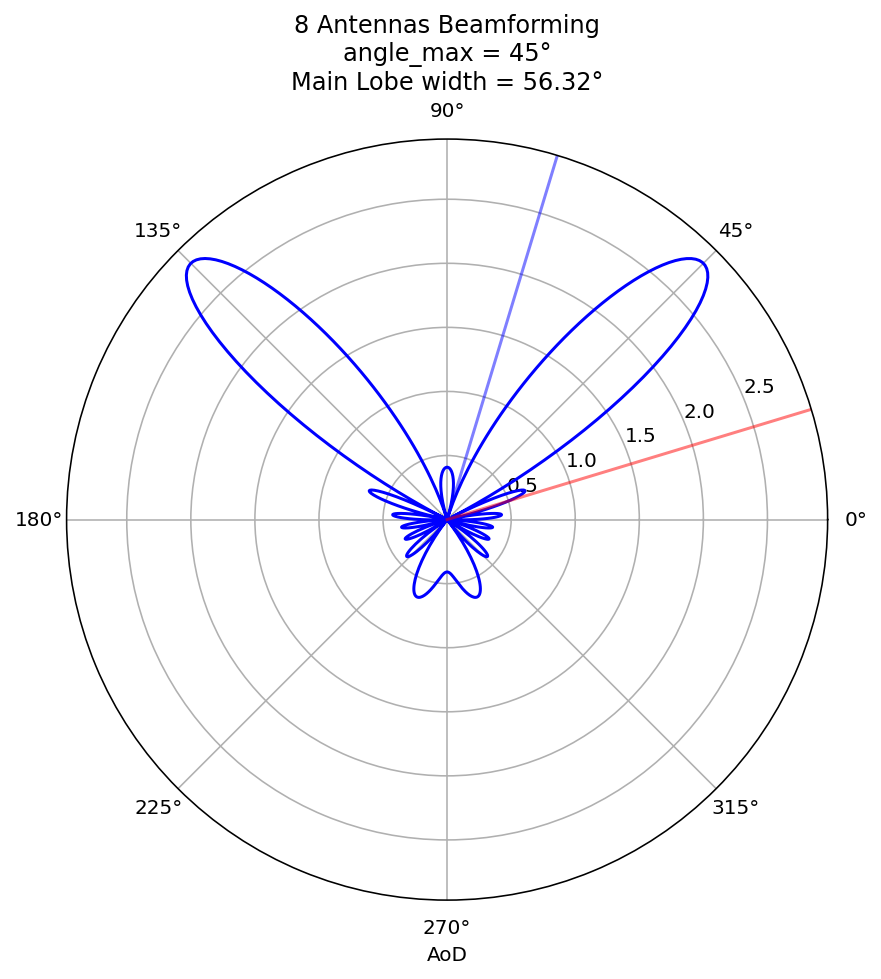

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def P (alpha, tx_antennas, angle_max):
    a = 1/np.sqrt(tx_antennas)
    #u = -np.pi*2*np.sin(alpha) + np.pi*2*np.sin(np.deg2rad(30)) # undersampling causes grating lobes
    u = -np.pi*np.sin(alpha) + np.pi*np.sin(np.deg2rad(angle_max))
    return a*np.sin(tx_antennas*(u/2))/np.sin(u/2)


tx_antennas = 8
angle_max = 45 #degrees
alpha = np.arange(-np.pi, np.pi, 0.01)

alpha_end_main_lobe = np.arcsin(2/tx_antennas + np.sin(np.deg2rad(angle_max))) # u =  pi
alpha_max_main_lobe = np.arcsin(np.sin(np.deg2rad(angle_max))) # u = 0
alpha_begin_main_lobe = alpha_end_main_lobe - 2 * (alpha_end_main_lobe - alpha_max_main_lobe)
delta_main_lobe = alpha_end_main_lobe - alpha_begin_main_lobe


#plt.polar(alpha, 10*np.log10(np.abs(P(alpha, tx_antennas))), color='r')
plt.polar(alpha, np.abs(P(alpha, tx_antennas, angle_max)), color='b')
plt.axvline(alpha_end_main_lobe, color = 'b', linewidth=1.5, alpha=0.5)
plt.axvline(alpha_begin_main_lobe, color = 'red', linewidth=1.5, alpha=0.5)


plt.xlabel("AoD")
plt.title(f'{tx_antennas} Antennas Beamforming' + f'\nangle_max = {angle_max}°\n' + f'Main Lobe width = {np.round(np.rad2deg(delta_main_lobe), 2)}°')